### Actividad 3: CREAR UN SISTEMA TASADOR DE VIVIENDAS.

In [395]:
# Leer el dataset
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/datos_viviendas.csv')
print(df.head())

  josrosrod_origen jorosrod_municipio  josrosrod_dia  josrosrod_mes  \
0         Fotocasa          Benetuser             16              2   
1         Fotocasa          Benetuser             16              2   
2         Fotocasa          Benetuser             16              2   
3         Fotocasa          Benetuser             16              2   
4         Fotocasa          Benetuser             16              2   

   josrosrod_año ricmirber_longitud josrosrod_lat josrosrod_precio  \
0           2025            -0,3950       39,4180           140000   
1           2025            -0,3980       39,4170            85000   
2           2025            -0,3987       39,4149           225000   
3           2025            -0,3990       39,4145           129999   
4           2025            -0,3985       39,4133           145000   

  alvbelnav_iluminacion  davsoreng_duplex  ...  rafmaralf_baños  \
0                  Alta                 0  ...                1   
1                 

In [396]:
# Mostramos las filas y columnas
print("Filas y columnas")
df.shape

Filas y columnas


(140, 21)

In [397]:
# Mostramos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   josrosrod_origen           140 non-null    object 
 1   jorosrod_municipio         140 non-null    object 
 2   josrosrod_dia              140 non-null    int64  
 3   josrosrod_mes              140 non-null    int64  
 4   josrosrod_año              140 non-null    int64  
 5   ricmirber_longitud         140 non-null    object 
 6   josrosrod_lat              140 non-null    object 
 7   josrosrod_precio           140 non-null    object 
 8   alvbelnav_iluminacion      140 non-null    object 
 9   davsoreng_duplex           140 non-null    int64  
 10  alegarsal_terraza          140 non-null    int64  
 11  rafmaralf_baños            140 non-null    int64  
 12  luctarcom_orientacion      139 non-null    object 
 13  samartlop_superficie       140 non-null    int64  

#### Nota: "Como podemos observar algunas columnas tienen un tipado erroneo como por ejemplo *josrosrod_precio* vamos a arreglar esto antes de continuar"

In [398]:
# Transformamos el tipo de columnas categoricas a numericas 
columns_wrong_type = ['ricmirber_longitud', 'josrosrod_lat', 'josrosrod_precio', 'elilopper_distanciaCentro']
df[columns_wrong_type] = df[columns_wrong_type].apply(lambda x: x.str.replace(',', '.'))
df[columns_wrong_type] = df[columns_wrong_type].apply(pd.to_numeric, errors='coerce')

# verificamos que se haya hecho la transformacion
print(df[columns_wrong_type].dtypes)



ricmirber_longitud           float64
josrosrod_lat                float64
josrosrod_precio             float64
elilopper_distanciaCentro    float64
dtype: object


In [399]:
# Sacamos estadisticas descriptivas
df.describe()

,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,davsoreng_duplex,alegarsal_terraza,rafmaralf_baños,samartlop_superficie,davroctau_planta,juamarxxx_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
count,140.000000,140.000000,140.000000,140.000000,132.000000,133.000000,140.000000,140.000000,140.000000,140.000000,139.000000,139.000000,140.000000,139.000000,140.000000,140.000000,140.000000
mean,15.657143,2.500000,2022.385714,-0.422702,39.475161,102229.375932,0.292857,0.664286,2.092857,128.064286,1.877698,0.366906,3.314286,0.589928,8.705071,0.578571,0.514286
std,6.150126,2.315105,9.917346,0.166026,0.134911,153854.873285,0.472197,0.488879,1.418766,76.409556,1.787478,0.483704,1.469526,0.493625,8.861696,0.495561,0.628870
min,1.000000,1.000000,1963.000000,-1.287300,39.202000,65.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,2.000000,2025.000000,-0.464175,39.422800,230.000000,0.000000,0.000000,1.000000,80.000000,1.000000,0.000000,3.000000,0.000000,3.097500,0.000000,0.000000
50%,16.000000,2.000000,2025.000000,-0.414000,39.469350,724.000000,0.000000,1.000000,2.000000,102.000000,1.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000
75%,20.000000,2.000000,2025.000000,-0.380650,39.504275,163000.000000,1.000000,1.000000,2.000000,140.000000,3.000000,1.000000,4.000000,1.000000,9.452500,1.000000,1.000000
max,31.000000,12.000000,2025.000000,0.467100,40.067200,1000000.000000,2.000000,2.000000,11.000000,430.000000,11.000000,1.000000,10.000000,1.000000,42.400000,1.000000,5.000000


#### 2. Análisis y preprocesamiento de datos

- 2.1 Análisis de datos: histogramas, boxplots, cantidad de datos ausentes, presencia de outliers.
- 2.2 Codificación de categóricas: label-encoding o one-hot-encoding.
- 2.3 Detección e imputación de ausentes.
- 2.4 Detección e imputación de anomalías.
- 2.5 Escalado de numéricas.
- 2.6 Debes ir creando un pipeline de manera que se le facilite uno de los ejemplos y lo preprocese para dárselo al modelo.

Análisis de datos: histogramas, boxplots, cantidad de datos ausentes, presencia de outliers.

In [400]:
# Calculamos el total de datos ausentes
df.isnull().sum()

josrosrod_origen             0
jorosrod_municipio           0
josrosrod_dia                0
josrosrod_mes                0
josrosrod_año                0
ricmirber_longitud           0
josrosrod_lat                8
josrosrod_precio             7
alvbelnav_iluminacion        0
davsoreng_duplex             0
alegarsal_terraza            0
rafmaralf_baños              0
luctarcom_orientacion        1
samartlop_superficie         0
davroctau_planta             1
juamarxxx_trastero           1
robripcon_habitaciones       0
omapasvac_ascensor           1
elilopper_distanciaCentro    0
rauramesc_airecentral        0
guifue_parking               0
dtype: int64

In [401]:
# Mostramos el porcentaje de datos ausentes respecto al total
df.isnull().sum() / df.shape[0]

josrosrod_origen             0.000000
jorosrod_municipio           0.000000
josrosrod_dia                0.000000
josrosrod_mes                0.000000
josrosrod_año                0.000000
ricmirber_longitud           0.000000
josrosrod_lat                0.057143
josrosrod_precio             0.050000
alvbelnav_iluminacion        0.000000
davsoreng_duplex             0.000000
alegarsal_terraza            0.000000
rafmaralf_baños              0.000000
luctarcom_orientacion        0.007143
samartlop_superficie         0.000000
davroctau_planta             0.007143
juamarxxx_trastero           0.007143
robripcon_habitaciones       0.000000
omapasvac_ascensor           0.007143
elilopper_distanciaCentro    0.000000
rauramesc_airecentral        0.000000
guifue_parking               0.000000
dtype: float64

In [402]:
# # Eliminamos las filas con datos ausentes
# print("Eliminamos las filas con datos ausentes")
# print(df.shape)
# data_clean = df.dropna()

# # Confirmamos que se han eliminado los datos ausentes
# print(data_clean.isnull().sum())
# print(data_clean.shape)

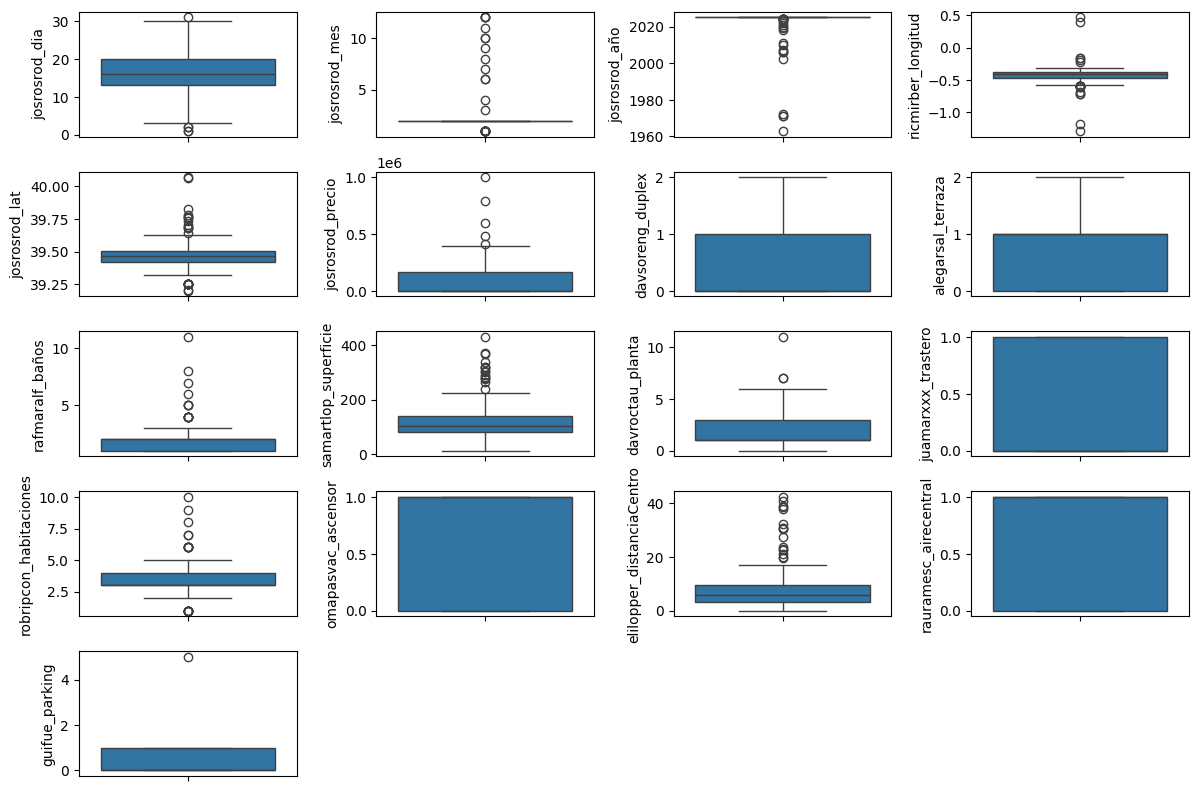

In [403]:
# Creamos boxplot para cada columna para ver la distribución de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las columnas numéricas
def view_boxplots(data):
    data_num = data.select_dtypes(include=['number'])
    num_cols = len(data_num.columns)

    # Definir las dimensiones de la cuadrícula
    cols = 4 
    rows = int(np.ceil(num_cols / cols))  # Calcula las filas necesarias

    # Crear la figura con el tamaño adecuado
    fig, ax = plt.subplots(rows, cols, figsize=(12, 8))

    # Asegurar que ax siempre sea un array plano
    ax = ax.flatten()
    # Dibujar los boxplots
    for i, col in enumerate(data_num.columns):
        sns.boxplot(data[col], ax=ax[i])

    # Ocultar los gráficos vacíos si hay menos de rows * cols subgráficos
    for j in range(i + 1, rows * cols):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Ajustar diseño
    plt.show()

view_boxplots(df)


In [404]:
# Imputamos la moda en los datos ausentes y en outliers
# Columnas con datos ausentes
df.isnull().sum()

# Obtenemos las columnas con datos ausentes
cols_with_na = df.columns[df.isnull().any()].tolist()
print(f"Columnas con datos ausentes {str(cols_with_na)}")

# Imputamos la moda en las columnas con datos ausentes

for col in cols_with_na:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Confirmamos que no hay datos ausentes
print("Verificamos que no hay datos ausentes")
print(df.isnull().sum())


Columnas con datos ausentes ['josrosrod_lat', 'josrosrod_precio', 'luctarcom_orientacion', 'davroctau_planta', 'juamarxxx_trastero', 'omapasvac_ascensor']
Verificamos que no hay datos ausentes
josrosrod_origen             0
jorosrod_municipio           0
josrosrod_dia                0
josrosrod_mes                0
josrosrod_año                0
ricmirber_longitud           0
josrosrod_lat                0
josrosrod_precio             0
alvbelnav_iluminacion        0
davsoreng_duplex             0
alegarsal_terraza            0
rafmaralf_baños              0
luctarcom_orientacion        0
samartlop_superficie         0
davroctau_planta             0
juamarxxx_trastero           0
robripcon_habitaciones       0
omapasvac_ascensor           0
elilopper_distanciaCentro    0
rauramesc_airecentral        0
guifue_parking               0
dtype: int64


Columna josrosrod_dia tiene 5 outliers
Columna josrosrod_mes tiene 38 outliers
Columna josrosrod_año tiene 24 outliers
Columna ricmirber_longitud tiene 20 outliers
Columna josrosrod_lat tiene 35 outliers
Columna josrosrod_precio tiene 6 outliers
Columna davsoreng_duplex tiene 0 outliers
Columna alegarsal_terraza tiene 0 outliers
Columna rafmaralf_baños tiene 13 outliers
Columna samartlop_superficie tiene 15 outliers
Columna davroctau_planta tiene 3 outliers
Columna juamarxxx_trastero tiene 0 outliers
Columna robripcon_habitaciones tiene 21 outliers
Columna omapasvac_ascensor tiene 0 outliers
Columna elilopper_distanciaCentro tiene 16 outliers
Columna rauramesc_airecentral tiene 0 outliers
Columna guifue_parking tiene 1 outliers
Columna 0      0
1      0
2      0
3      0
4      0
      ..
135    0
136    0
137    0
138    0
139    0
Name: davsoreng_duplex, Length: 140, dtype: int64 tiene 0 outliers
Columna 0      0
1      0
2      0
3      0
4      0
      ..
135    0
136    0
137    0

/tmp/ipykernel_967/1514560100.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].loc[outliers] = moda


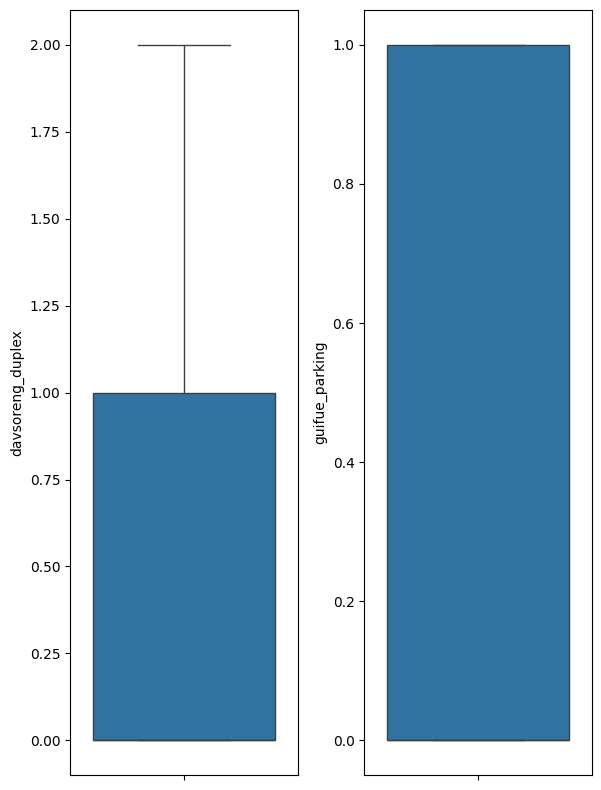

In [405]:
# Obtenemos las columnas con outliers con el método del rango intercuartílico
data_num = df.select_dtypes(include=['number'])
for col in data_num.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = (df[col] < lim_inf) | (df[col] > lim_sup)
    print(f"Columna {col} tiene {outliers.sum()} outliers")


# Creamos una funcion para imputar la moda en algunas columnas con outliers
def impute_mode_outliers(df, cols):
    df_clean = df.copy()

    for col in cols:
        if col in df_clean.columns and df_clean[col].dtype != 'object':
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lim_inf = Q1 - 1.5 * IQR
            lim_sup = Q3 + 1.5 * IQR
            outliers = (df_clean[col] < lim_inf) | (df_clean[col] > lim_sup)
            print(f"Columna {df_clean[col] } tiene {outliers.sum()} outliers")

            if outliers.sum() > 0:
                print(f"Imputando la moda en la columna {col}")
                moda = df_clean[col].mode()[0]
                df_clean[col].loc[outliers] = moda
    return df_clean


columns_with_outliers = ['davsoreng_duplex', 'guifue_parking']
df_clean = impute_mode_outliers(df, columns_with_outliers)

# En la columnas davsoeng_duplex remplazamos los outliers por la moda
print("Valores únicos en la columna davsoreng_duplex")
print(df_clean['davsoreng_duplex'].unique())
df_clean['davsoreng_duplex'] = df_clean['davsoreng_duplex'].replace('2', df_clean['davsoreng_duplex'].mode()[0])
print("Valores únicos en la columna davsoreng_duplex")
print(df_clean['davsoreng_duplex'].unique())


# Confirmamos que no hay outliers
columns = ['davsoreng_duplex', 'guifue_parking']
view_boxplots(df_clean[columns])



##### 2.2 Codificación de categóricas: label-encoding o one-hot-encoding.

In [406]:
# Mostramos los valores unicos de cada columna categorica
df_cat = df_clean.select_dtypes(include=['object'])
for col in df_cat.columns:
    print(f"Columna: {col}")
    print(df_clean[col].unique())

Columna: josrosrod_origen
['Fotocasa' 'Idealista' 'Tempocasa' 'habitaclia' 'Tucasa' 'Pisos.com'
 'Tecnocasa' 'fotocasa' '100casas' 'Habitaclia' 'Idealista.com'
 'Milanuncios' 'rosaginer.es' 'finqueslliria.es' 'lioncapitalg.com'
 'alameda10dt.es' 'IDEALISTA' 'FOTOCASA' 'ALFAMISLATA']
Columna: jorosrod_municipio
['Benetuser' 'Paterna' 'Ademuz' 'Gilet' 'Valencia' "L'Eliana" 'Picassent'
 'Torrent' 'Burjassot' 'Benetúser' 'Lliria' 'Torrefiel' 'Paiporta'
 'Catarroja' 'Albal' 'Calicanto' 'Sedaví' 'Campanar' 'Godella'
 'Ciutat Vella' 'Rocafort' 'Los monasterios' 'Turis' 'Almenara'
 'Benifaraig' 'Tavernes Blanques' 'Pobla de Vallbona' 'Sueca' 'Chilches'
 'Chiva' 'Bétera' 'MISLATA']
Columna: alvbelnav_iluminacion
['Alta' 'Baja' 'Media' 'baja' 'media' 'Medio']
Columna: luctarcom_orientacion
['Sureste' 'Este' 'Sur' 'Oeste' 'Noreste' 'Norte' 'Sud' 'oeste']


In [407]:
# Limpieza de los datos categoricos
# Columnas con datos categoricos
df_cat = df_clean.select_dtypes(include=['object'])
def clean_categorical_data(data):
    data_clean = data.copy()

    # Eliminar espacios en blanco al principio y al final de las cadenas
    data_clean = data_clean.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Convertir a minúsculas
    data_clean = data_clean.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

    return data_clean

df_clean = clean_categorical_data(df_clean)

# Mostramos los valores unicos de cada columna categorica
df_cat = df_clean.select_dtypes(include=['object'])

df_cat['jorosrod_municipio'] = df_cat['jorosrod_municipio'].str.replace('j-', 'paiporta')
df_cat['alvbelnav_iluminacion'] = df_cat['alvbelnav_iluminacion'].str.replace('medio', 'media')
df_cat['luctarcom_orientacion'] = df_cat['luctarcom_orientacion'].str.replace('sud', 'sur')

for col in df_cat.columns:
    print(f"Columna: {col}")
    print(df_cat[col].unique())

print(df_cat.shape)

Columna: josrosrod_origen
['fotocasa' 'idealista' 'tempocasa' 'habitaclia' 'tucasa' 'pisos.com'
 'tecnocasa' '100casas' 'idealista.com' 'milanuncios' 'rosaginer.es'
 'finqueslliria.es' 'lioncapitalg.com' 'alameda10dt.es' 'alfamislata']
Columna: jorosrod_municipio
['benetuser' 'paterna' 'ademuz' 'gilet' 'valencia' "l'eliana" 'picassent'
 'torrent' 'burjassot' 'benetúser' 'lliria' 'torrefiel' 'paiporta'
 'catarroja' 'albal' 'calicanto' 'sedaví' 'campanar' 'godella'
 'ciutat vella' 'rocafort' 'los monasterios' 'turis' 'almenara'
 'benifaraig' 'tavernes blanques' 'pobla de vallbona' 'sueca' 'chilches'
 'chiva' 'bétera' 'mislata']
Columna: alvbelnav_iluminacion
['alta' 'baja' 'media']
Columna: luctarcom_orientacion
['sureste' 'este' 'sur' 'oeste' 'noreste' 'norte']
(140, 4)


In [408]:
# Conversion de las columnas categoricas a numericas
from sklearn.preprocessing import LabelEncoder

# Convertimos las columnas categoricas a numericas con LabelEncoder
orden_label = ['baja', 'media', 'alta']
df_cat['iluminacion_ordinal'] = df_cat['alvbelnav_iluminacion'].map(lambda x: orden_label.index(x))
df_cat = df_cat.drop(columns=['alvbelnav_iluminacion'])

df_cleaned = pd.concat([df_clean, df_cat], axis=1)
df_cleaned = df_cleaned.drop(columns='alvbelnav_iluminacion')
print(df_cleaned.info())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   josrosrod_origen           140 non-null    object 
 1   jorosrod_municipio         140 non-null    object 
 2   josrosrod_dia              140 non-null    int64  
 3   josrosrod_mes              140 non-null    int64  
 4   josrosrod_año              140 non-null    int64  
 5   ricmirber_longitud         140 non-null    float64
 6   josrosrod_lat              140 non-null    float64
 7   josrosrod_precio           140 non-null    float64
 8   davsoreng_duplex           140 non-null    int64  
 9   alegarsal_terraza          140 non-null    int64  
 10  rafmaralf_baños            140 non-null    int64  
 11  luctarcom_orientacion      140 non-null    object 
 12  samartlop_superficie       140 non-null    int64  
 13  davroctau_planta           140 non-null    float64

In [ ]:
def convert_onehot_to_numeric(data, columns):
    data_clean = data.copy()
    data_clean = pd.get_dummies(data_clean, columns=columns, dtype=int)
    return data_clean


# Convertimos las columnas categoricas a numericas con One Hot Encoding
columns_to_convert = ['josrosrod_origen','jorosrod_municipio','luctarcom_orientacion']
df_convert = convert_onehot_to_numeric(df_cleaned, columns_to_convert)

# df_clean = df_clean.concat(df_convert, axis=1)

# Concatenamos los dataframes
# Eliminasmo las filas que hemos convertido a numericas
df_cleaned = pd.concat([df_cleaned, df_convert], axis=1)
df_cleaned = df_cleaned.drop(columns=columns_to_convert)

# Mostramos las columnas del dataframe	
print(df_cleaned.columns)
print(df_cleaned.shape)

Index(['josrosrod_dia', 'josrosrod_mes', 'josrosrod_año', 'ricmirber_longitud',
       'josrosrod_lat', 'josrosrod_precio', 'davsoreng_duplex',
       'alegarsal_terraza', 'rafmaralf_baños', 'samartlop_superficie',
       ...
       'luctarcom_orientacion_oeste', 'luctarcom_orientacion_sud',
       'luctarcom_orientacion_sur', 'luctarcom_orientacion_sureste',
       'luctarcom_orientacion_este', 'luctarcom_orientacion_noreste',
       'luctarcom_orientacion_norte', 'luctarcom_orientacion_oeste',
       'luctarcom_orientacion_sur', 'luctarcom_orientacion_sureste'],
      dtype='object', length=143)
(140, 143)


In [ ]:
# Mostramos como ha quedado el dataset
print(df_cleaned.info())

   josrosrod_dia  josrosrod_mes  josrosrod_año  ricmirber_longitud  \
0             16              2           2025             -0.3950   
1             16              2           2025             -0.3980   
2             16              2           2025             -0.3987   
3             16              2           2025             -0.3990   
4             16              2           2025             -0.3985   

   josrosrod_lat  josrosrod_precio  davsoreng_duplex  alegarsal_terraza  \
0        39.4180          140000.0                 0                  1   
1        39.4170           85000.0                 0                  0   
2        39.4149          225000.0                 0                  2   
3        39.4145          129999.0                 0                  0   
4        39.4133          145000.0                 0                  1   

   rafmaralf_baños  samartlop_superficie  ...  luctarcom_orientacion_oeste  \
0                1                    81  ...     

#### 3. Selección de características:
- 3.1 Matriz de correlaciones y mapa de calor: más fácil de interpretar si dejas el target como la primera característica.
- 3.2 Estudio estadístico univariado (eliminar características con poca influencia en target).
- 3.3 Estudio de colinealidad por parejas (eliminar alta correlación entre predictoras)

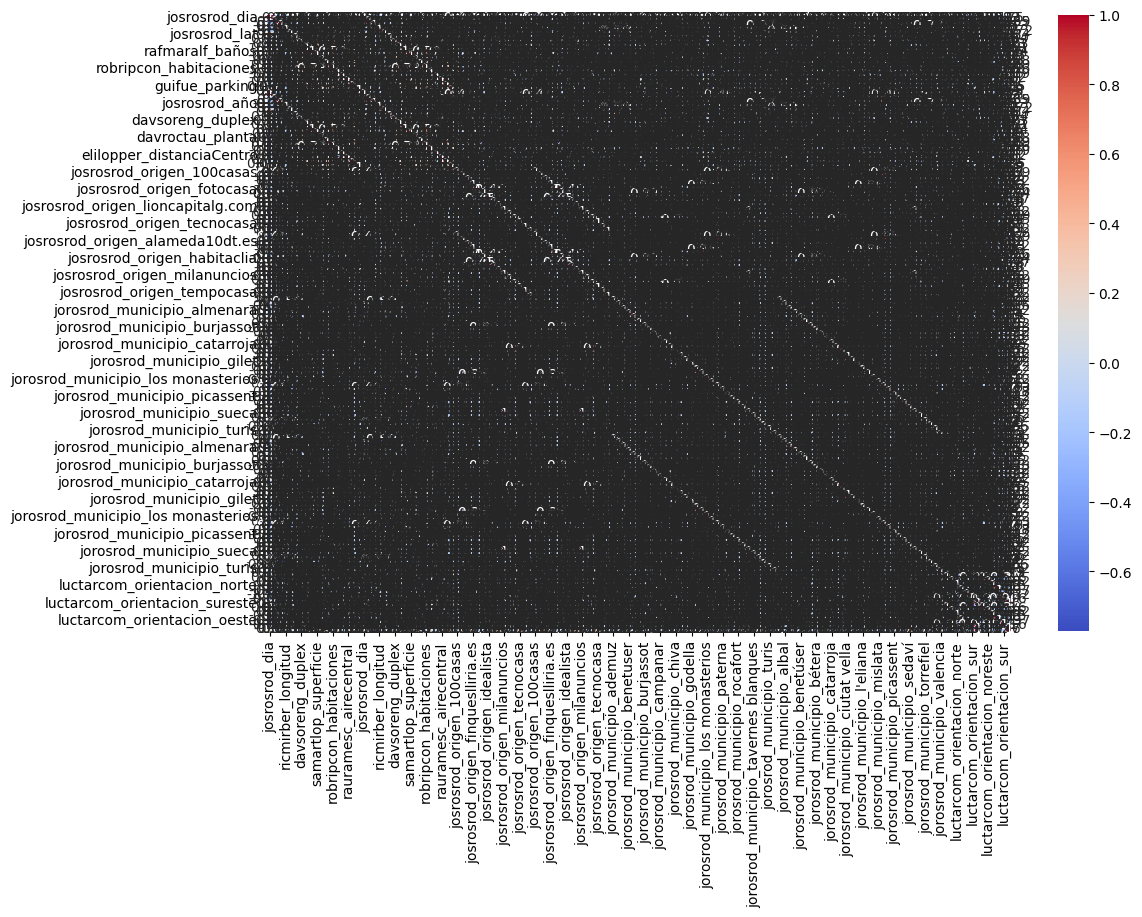

In [414]:
# Creamos una matriz de correlación para ver la relación entre las variables
corr = df_cleaned.corr()

# Creamos un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
